# Emotion Detection

## Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


## Exploring Dataset

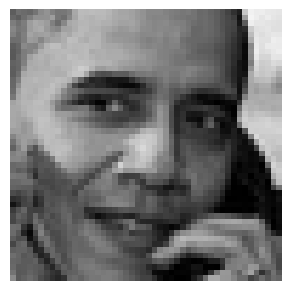

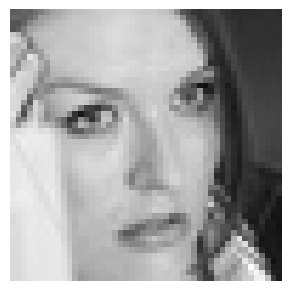

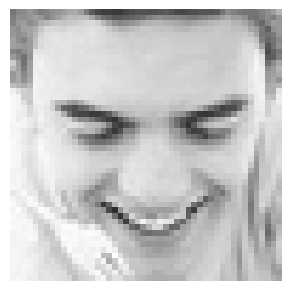

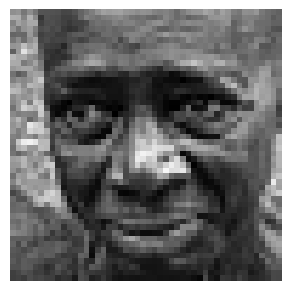

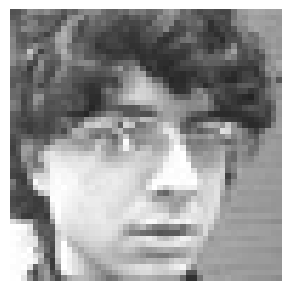

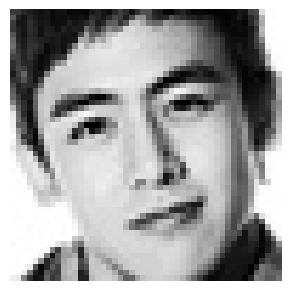

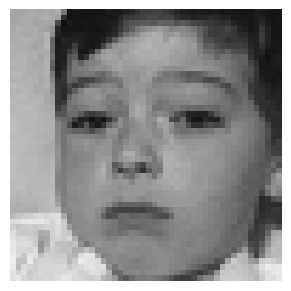

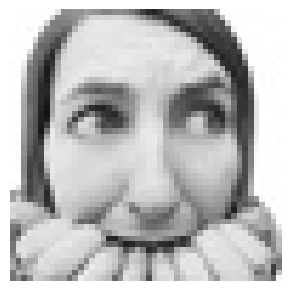

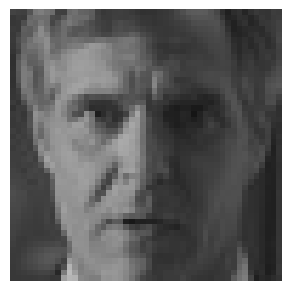

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

## Preparing Data For Training

In [34]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)
datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("train/",target_size=(img_size,img_size),color_mode="grayscale",batch_size=batch_size,class_mode="categorical",shuffle=True)

Found 28709 images belonging to 7 classes.
Found 28709 images belonging to 7 classes.


## Defining Model

In [35]:
def Convolution(input_tensor,filters,kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [36]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [37]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7,activation = 'softmax')(dense_1)
    model = Model(inputs = [inputs], outputs = [output])
    
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [38]:
model = model_fer((48,48,1))
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_25 (Ba  (None, 48, 48, 128)       512       
 tchNormalization)                                               
                                                                 
 activation_25 (Activation)  (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 24, 24, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 128)       0   

## Initializing The Model

In [42]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.hs", monitor = 'val_accuracy', save_weights_only = True, mode = 'max', verbose = 1)
callbacks = [checkpoint]

## Training The Model

In [43]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15
448/448 [==============================] - ETA: 0s - loss: 1.6477 - accuracy: 0.3750
Epoch 1: saving model to model_weights.hs
448/448 [==============================] - 64s 143ms/step - loss: 1.6477 - accuracy: 0.3750 - val_loss: 1.5466 - val_accuracy: 0.3974
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3506 - accuracy: 0.4863
Epoch 2: saving model to model_weights.hs
448/448 [==============================] - 63s 142ms/step - loss: 1.3506 - accuracy: 0.4863 - val_loss: 1.4025 - val_accuracy: 0.4752
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1907 - accuracy: 0.5526
Epoch 3: saving model to model_weights.hs
448/448 [==============================] - 63s 142ms/step - loss: 1.1907 - accuracy: 0.5526 - val_loss: 1.3126 - val_accuracy: 0.5039
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0622 - accuracy: 0.6054
Epoch 4: saving model to model_weights.hs
448/448 [==============================] - 63s

## Model Evaluation

In [45]:
model.evaluate(validation_generator)

449/449 [==============================] - 12s 27ms/step - loss: 0.1690 - accuracy: 0.9517


[0.169032022356987, 0.9517224431037903]

## Plotting Loss

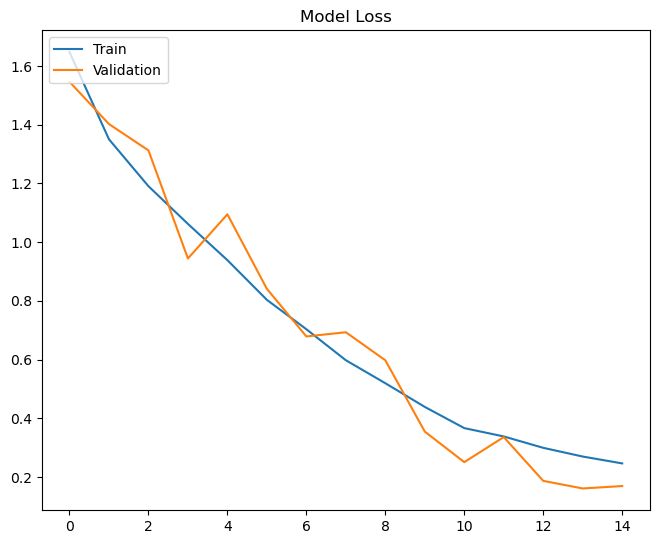

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

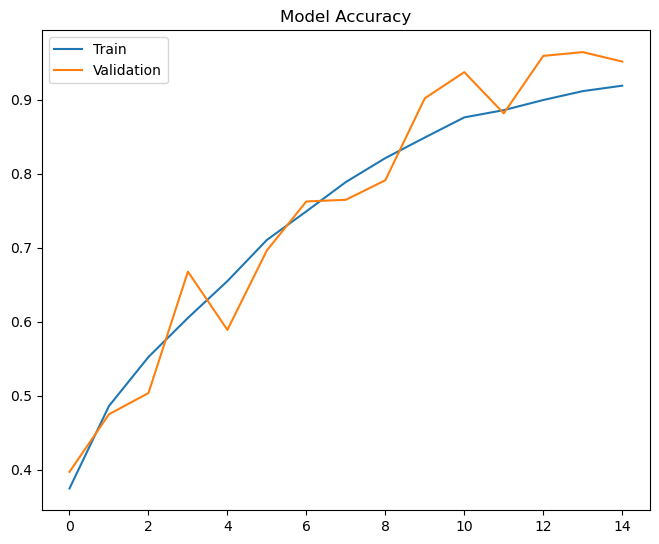

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

## Saving Model

In [51]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)